# 1. <u>Importing Packages and Loading Data<u>

## Imorting Packages

In [178]:
import numpy as np
import pandas as pd

# Linear Models, their CV and Statsmods
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
import statsmodels.api as sm

# Pre-processing packages
from sklearn.preprocessing import StandardScaler

# Classifiers packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Classifier Metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

import time
import pickle

# Graph-Plotting Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark", {'axes.grid' : False})  # So that your grids have no axis
%matplotlib inline

## Loading Dataset

In [106]:
path = "C:/Users/HP/Desktop/Credit Card Default Prediction/Credit-Card-Default-Prediction-ML-Project/dataset/UCI_Credit_Card.csv"
cc_data = pd.read_csv(path)
cc_data.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [107]:
rows, columns = cc_data.shape
print(f"Number of observations in data : {rows}")
print(f"Number of Variables in data : {columns}")

Number of observations in data : 30000
Number of Variables in data : 25


# About Dataset
### Dataset Information
The dataset considered in this analysis is the “Default of Credit Card Clients” dataset released under the public liscense of Creative Commons and available on the Kaggle website. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
This dataset contains 30000 observations of 25 variables from a bank (and also a cash and credit card issuer in Taiwan); where each observation corresponds to a particular credit card client. Among the total 30000 observations, 6636 observations (22.1%) are cardholders with default payment.

The 25 variables in this dataset comprises of demographic variables (gender, education level, marriage status, and age) and financial variables of 6-months worth of payment data from April 2005 to September 2005 (amount of given credit, monthly repayment statuses, monthly amount of bill statements, and monthly amount of previous payments).

### Understanding the Variable

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (`1=male`, `2=female`)
* **EDUCATION**: (`1=graduate school`, `2=university`, `3=high school`, `4=others`, `5=unknown`, `6=unknown`)
* **MARRIAGE**: Marital status (`1=married`, `2=single`, `3=others`)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (`-1=pay duly`, `1=payment delay for one month`, `2=payment delay for two months`, … `8=payment delay for eight months`, `9=payment delay for nine months and above`)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes(`Telltale signs of a potential defaulter`), 0=no(`More consistency to loaning process`))

In [108]:
cc_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [109]:
# Renaming the columns in more understable way
cc_data.rename(columns={'PAY_0':'PAY_1', 'SEX':'GENDER', 'default.payment.next.month':'DEFAULT'},
              inplace=True)
cc_data.drop(columns=['ID'], axis = 1, inplace=True)
cc_data.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [110]:
# Data type of our columns and count of null value
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   GENDER     30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [111]:
# lets see the statistics of our dataset
cc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## Data Cleaning

##### As we see above, Eduaction and Marriage are different. Their min points are out of the dataset.

In [112]:
# Education
print("Education column values :", cc_data.EDUCATION.unique())

Education column values : [2 1 3 5 4 6 0]


In [113]:
# Marriage
print("Marrige column values :", cc_data.MARRIAGE.unique())

Marrige column values : [1 2 3 0]


#####  These values don't align with the variable as per mention in the dataset. So we group the different observations as 'others'.  

So, We Grouped unknown `EDUCATION` categories (0, 5, 6) and reassigned them to 4 (others) and aslo we Grouped unknown of `MARRIAGE` categories (0) and re-assigned them to 3 (others)

### Education
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [114]:
print("Before re-assigning total number of unique values:\n", cc_data.EDUCATION.value_counts())
print('\r')
cc_data.EDUCATION.replace(to_replace=[0, 5, 6], value=4, inplace=True)
print("After re-assigning total number of unique values:\n", cc_data.EDUCATION.value_counts())

Before re-assigning total number of unique values:
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

After re-assigning total number of unique values:
 2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

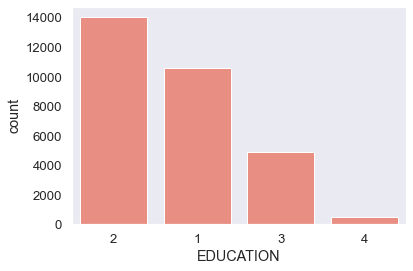

In [115]:
# When we see it by graph
fig, ax = plt.subplots()
sns.countplot(data=cc_data, 
              x="EDUCATION", 
              order=cc_data["EDUCATION"].value_counts().index,
             color='salmon')

### Marriage
Marital status (1 = married; 2 = single; 3 = others).

In [116]:
print("Before re-assigning total number of unique values:\n", cc_data.MARRIAGE.value_counts())
print('\r')
cc_data.MARRIAGE.replace(to_replace=0, value=3, inplace=True)
print("After re-assigning total number of unique values:\n", cc_data.MARRIAGE.value_counts())

Before re-assigning total number of unique values:
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

After re-assigning total number of unique values:
 2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

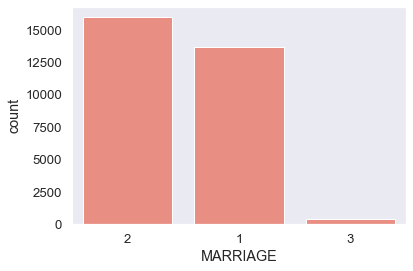

In [117]:
fig, ax = plt.subplots()
sns.countplot(data=cc_data, 
              x='MARRIAGE', 
              order=cc_data["MARRIAGE"].value_counts().index, 
              color='salmon')

# 2. <u>Data Exploration</u>

## Mapping The Target

In [118]:
print(cc_data["DEFAULT"].value_counts(), '\n')
print("Size of target :", len(cc_data['DEFAULT']))

0    23364
1     6636
Name: DEFAULT, dtype: int64 

Size of target : 30000


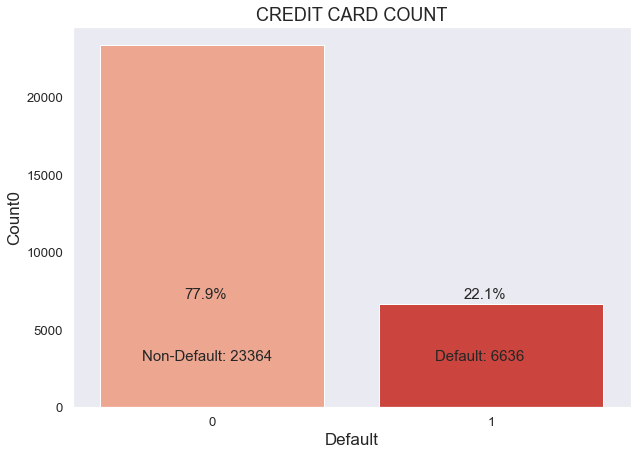

In [119]:
 # Frequency of the defaults
default = cc_data['DEFAULT'].sum() # adding all the default cases in the data
no_default = len(cc_data['DEFAULT']) - default # total dataset - default cases

# Percentage of the defaults
default_percent = round(default/len(cc_data['DEFAULT'])*100, 1)
no_default_percent = round(no_default/len(cc_data['DEFAULT'])*100, 1)

# Plotting target of datset
fig, ax = plt.subplots(figsize=(10, 7)) # size of graph
sns.set_context(context="notebook", font_scale=1.2) # change the size or elements of graph

sns.countplot(data=cc_data, x=cc_data['DEFAULT'], palette="Reds")
plt.annotate('Non-Default: {}'.format(no_default),
            xy=(-0.25, 3000),
            size=15)
plt.annotate('Default: {}'.format(default),
            xy=(0.8, 3000),
            size=15)
plt.annotate("{}%".format(no_default_percent), xy=(-0.1, 7000), size=15)
plt.annotate("{}%".format(default_percent), xy=(0.9, 7000), size=15)

plt.title("CREDIT CARD COUNT", size=18)
plt.xlabel('Default', size=17)
plt.ylabel("Count0", size=17)

plt.show()

## Frequency of categorical explanatory variables for Default and No defalut cards

In [120]:
# creating data frame with categorical explanatory variables.
categorical_df = cc_data[['GENDER', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                          'DEFAULT']] 

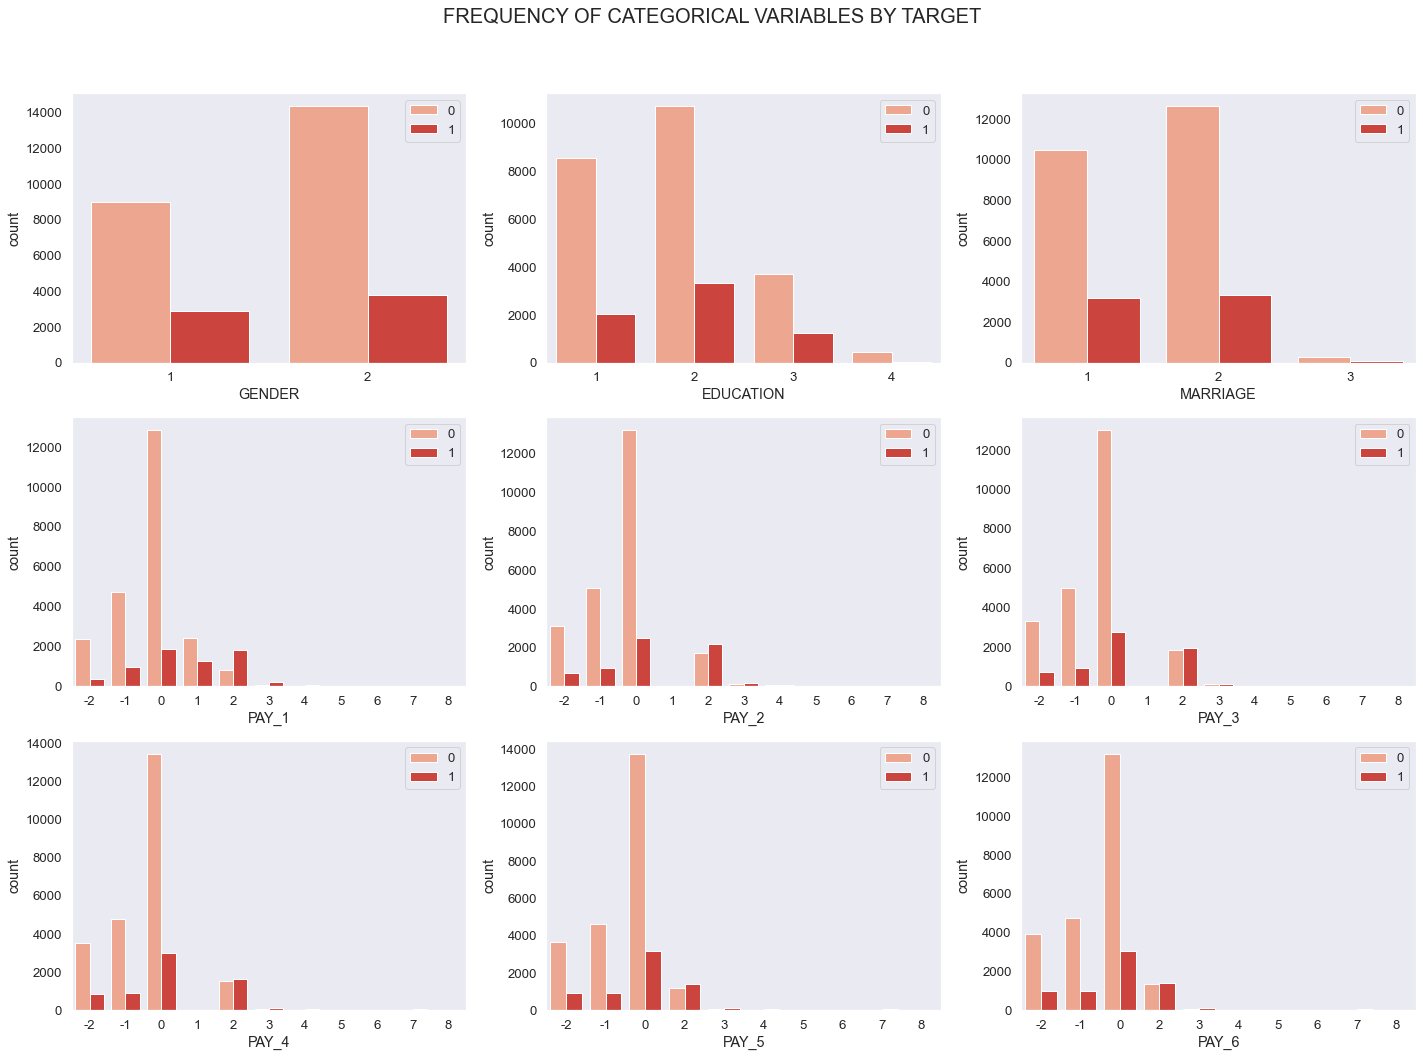

In [121]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
fig.suptitle("FREQUENCY OF CATEGORICAL VARIABLES BY TARGET", size=20)

# Creating a plot for each categorical variable to target 
plot1 = sns.countplot(x='GENDER', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[0,0])
plot2 = sns.countplot(x='EDUCATION', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[0,1])
plot3 = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[0,2])
plot4 = sns.countplot(x='PAY_1', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[1,0])
plot5 = sns.countplot(x='PAY_2', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[1,1])
plot6 = sns.countplot(x='PAY_3', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[1,2])
plot7 = sns.countplot(x='PAY_4', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[2,0])
plot8 = sns.countplot(x='PAY_5', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[2,1])
plot9 = sns.countplot(x='PAY_6', hue='DEFAULT', data=categorical_df, palette='Reds', ax=axes[2,2])

# Setting legends to upper right
plot1.legend(loc="upper right")
plot2.legend(loc="upper right")
plot3.legend(loc="upper right")
plot4.legend(loc="upper right")
plot5.legend(loc="upper right")
plot6.legend(loc="upper right")
plot7.legend(loc="upper right")
plot8.legend(loc="upper right")
plot9.legend(loc="upper right")

fig.tight_layout() # Prevents graph from overlapping with each other
fig.subplots_adjust(top=0.9)

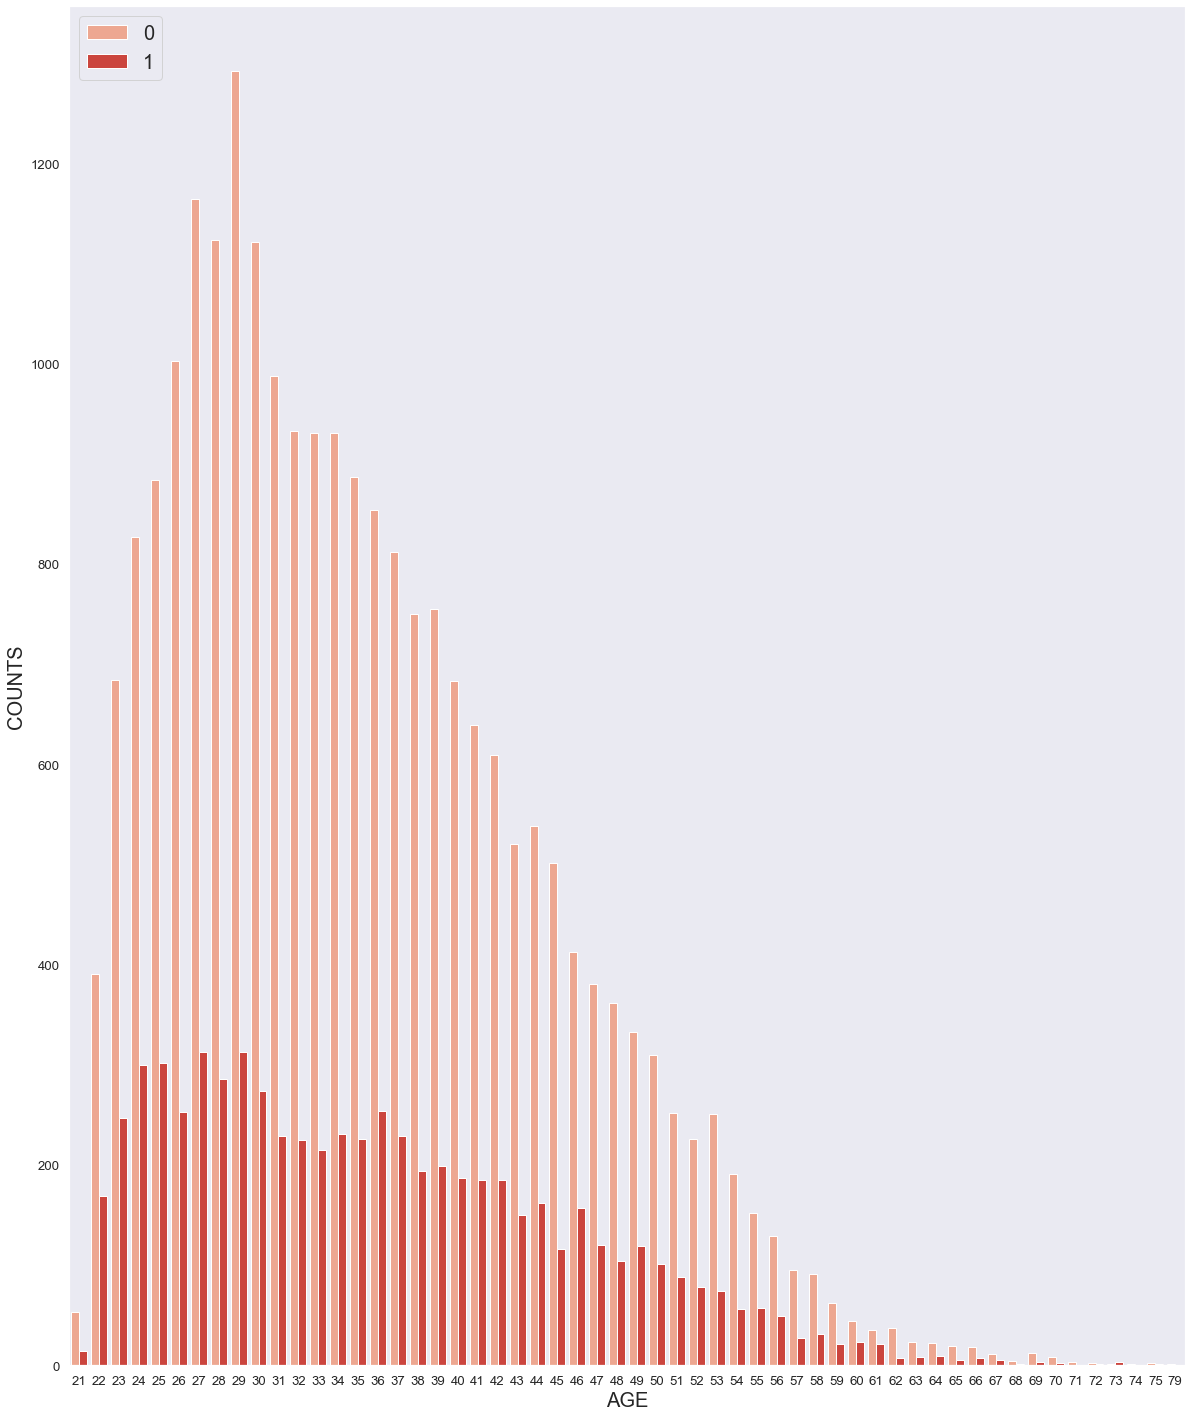

In [122]:
# By age 
fig, axz = plt.subplots(figsize=(20, 25))

axz = sns.countplot(x='AGE', hue='DEFAULT', data=cc_data, palette='Reds')

axz.set_ylabel('COUNTS', size=20)
axz.set_xlabel('AGE', size=20)
axz.legend(loc=0,fontsize=20)


<ipython-input-123-3a3b54b989a1>:13: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



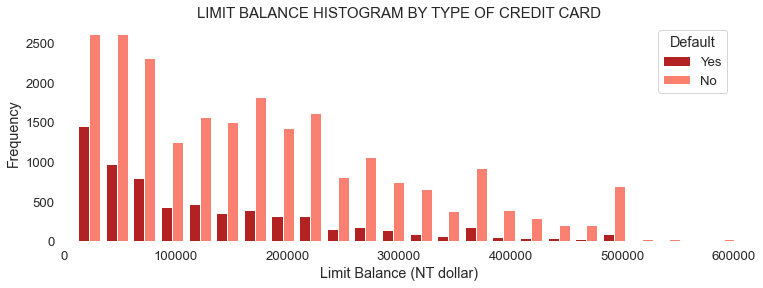

In [123]:
# Can we infer more? what about the columns for lIMIT_BALANCE?
x1 = list(cc_data[cc_data['DEFAULT'] == 1]['LIMIT_BAL'])
x2 = list(cc_data[cc_data['DEFAULT'] == 0]['LIMIT_BAL'])

fig2, ax_lim_bal = plt.subplots(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['firebrick', 'salmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)

# 3. <u>Feature Selection</u>

## Correlation Matrix

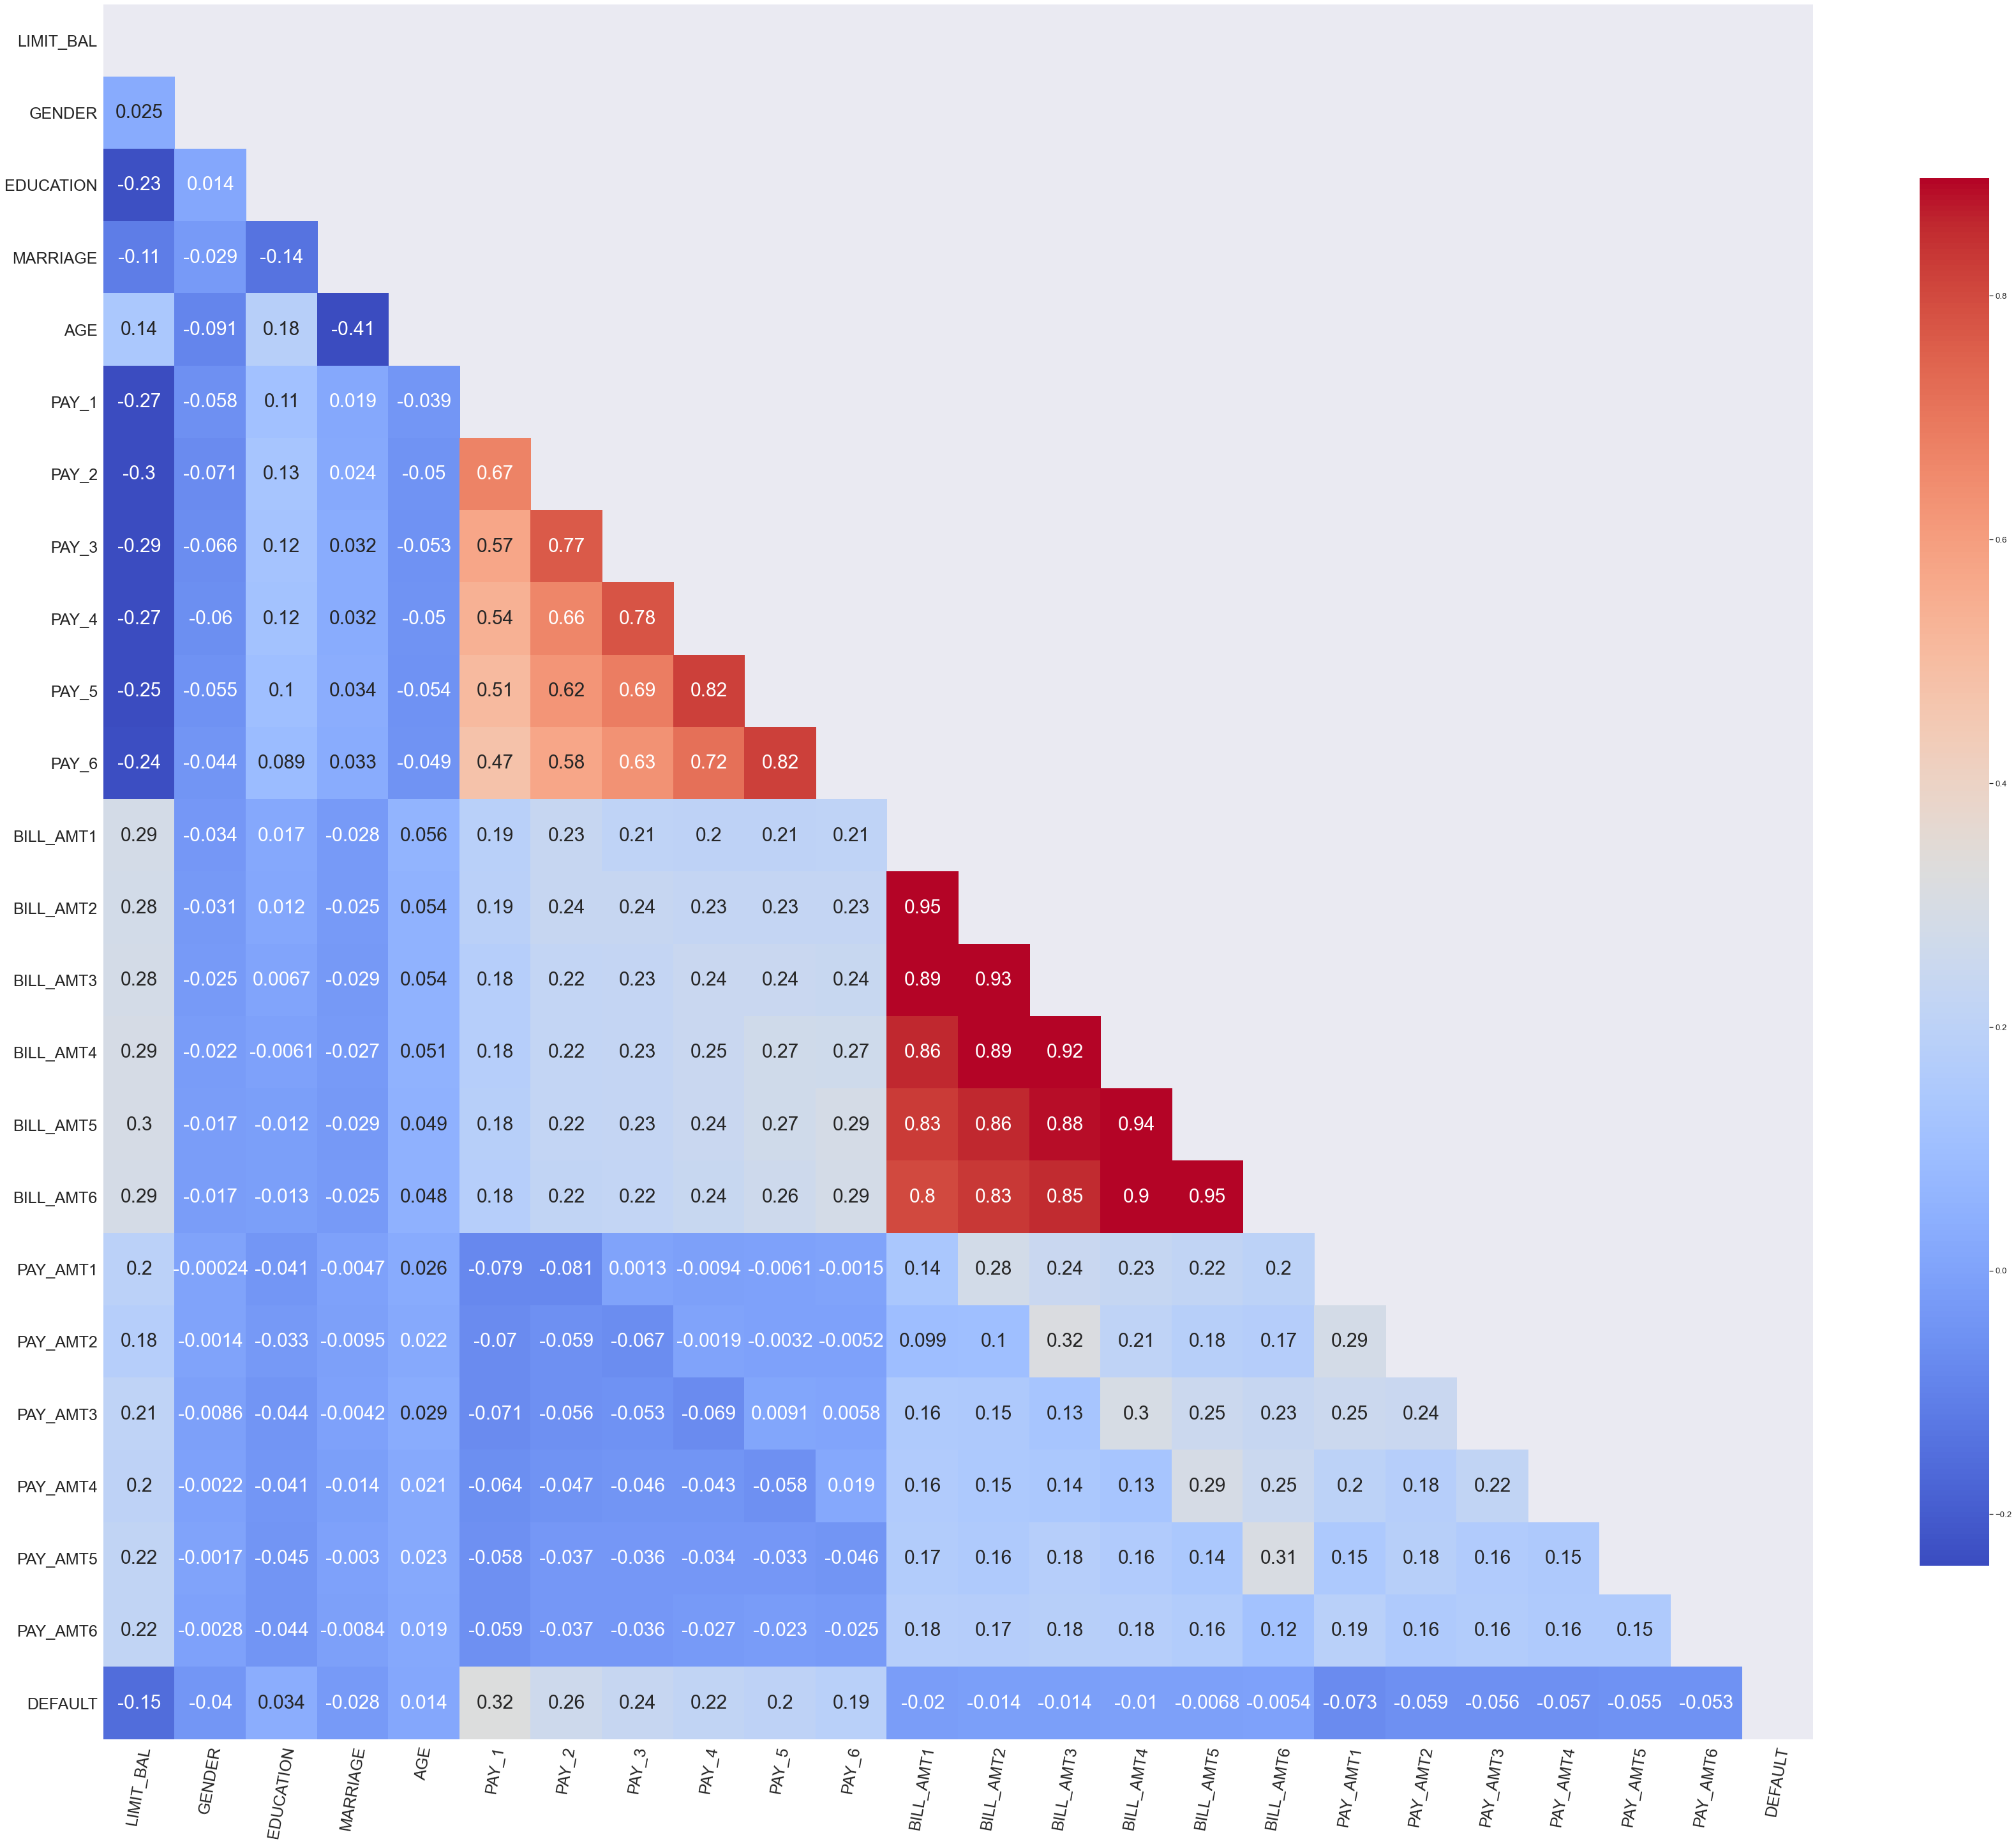

In [124]:
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))
data = cc_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g=sns.heatmap(data=data, ax=ax, annot=True, robust=True, mask=mask, cmap='coolwarm',
            annot_kws={"size":30},  #Annotation size
            cbar_kws={"shrink": 0.8} # Color bar size)
           )

# Changes size of the values on the label
ax.tick_params(labelsize=25) 
ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

In [125]:
df_default_corr = data.iloc[:-1, -1:]
df_default_corr

,DEFAULT
LIMIT_BAL,-0.153520
GENDER,-0.039961
EDUCATION,0.033842
MARRIAGE,-0.027575
AGE,0.013890
PAY_1,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149


<AxesSubplot:>

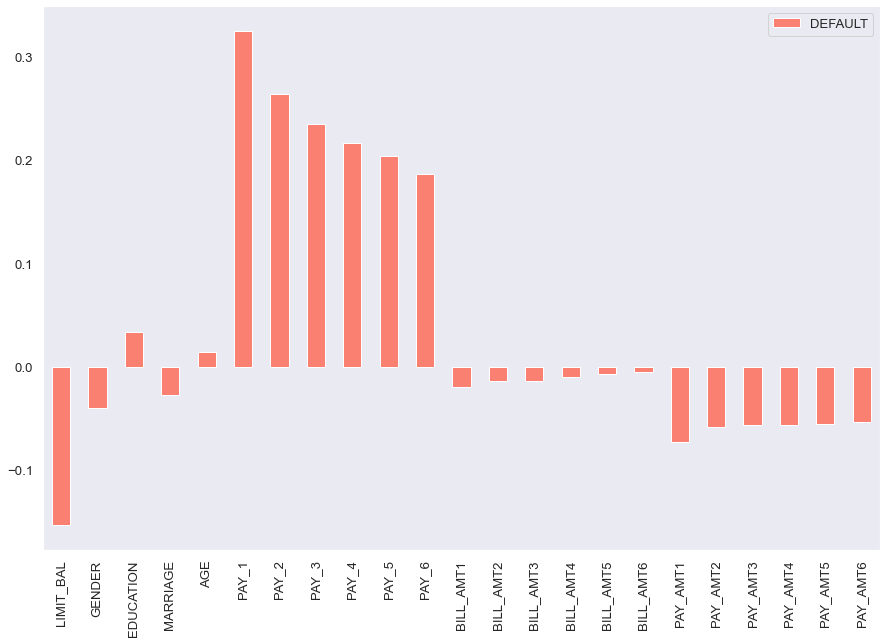

In [195]:
df_default_corr.plot(kind='bar', figsize=(15, 10), color='salmon')

From the above graph we can visually see that PAY_1 has the highest correlation to DEFAULT or not!

In [127]:
data.iloc[:-1, -1:].max() # This is for PAY_1

DEFAULT    0.324794
dtype: float64

## Feature Importance Described by RandomForest

<div style="border-style: ridge;">
    <br>
    <center style="font-size: 25px;"><i>Train Test and Cross Validation</i></center>
    <br>
    <img src="https://miro.medium.com/max/1400/1*4G__SV580CxFj78o9yUXuQ.png"
         alt="Markdown image"
         style="width: 80%;" />
    <br>
</div>

In [186]:
# seperate data into feature set(X) and target set(y)
X = cc_data.drop(columns='DEFAULT')
y = cc_data.iloc[:, -1]

In [187]:
# splitting data into train/val set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=70) # 20% Holdout method
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=70) # 80% Train/val set

# shape or our trian and validation set
print("Size of training set :", (X_train.shape, y_train.shape))
print("Size of Validation set :", (X_val.shape, y_val.shape))

print("Size of testing set :", (X_test.shape, y_test.shape))

Size of training set : ((18000, 23), (18000,))
Size of Validation set : ((6000, 23), (6000,))
Size of testing set : ((6000, 23), (6000,))


In [188]:
# Scaling data points
scale = StandardScaler()
scale.fit(X_train_val.values)
x_train_val_scaled = scale.transform(X_train_val.values) # scaling train/val set

In [189]:
# Instantiateing the random forest model.
randomForest = RandomForestClassifier()

# Fitting the model on training data.
randomForest.fit(x_train_val_scaled, y_train_val.values)

RandomForestClassifier()

<AxesSubplot:>

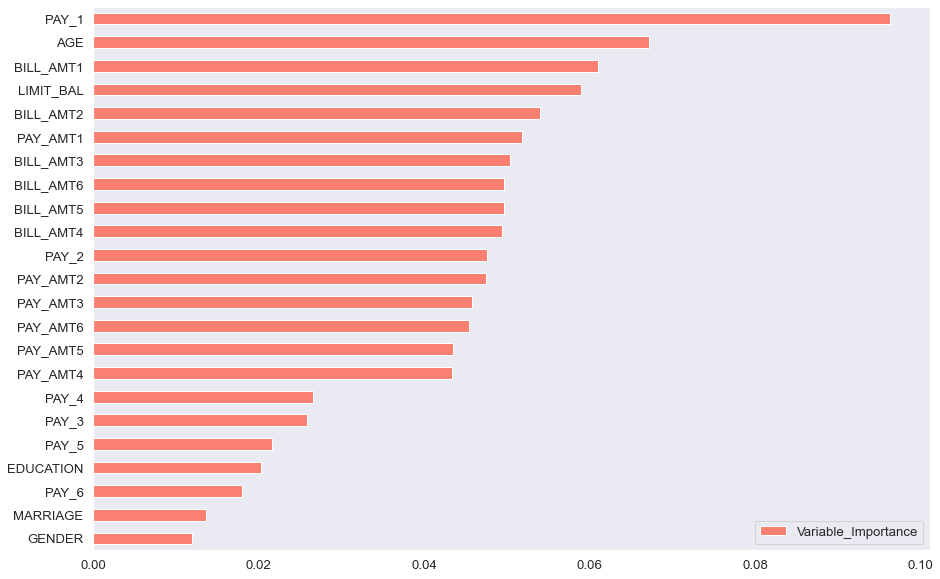

In [194]:
# Obtaining the feature importance
feature_importance = pd.DataFrame(randomForest.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',
                                   ascending=True)

feature_importance.plot.barh(figsize=(15,10), color='salmon')

```python
# Saving a model in to pickle

with open('raw_processed_dataset.pkl', 'wb') as file:
    pickle.dump(cc_data, file)
```

# 4. <u>Preliminary Model Test with Processed Dataset</u>

**The models we'll used here are:**

1. Logistic Regression
2. K-Nearest Neighbor
3. Naive Bayes Classifier
4. Support Vector Machines (LinearSVC)
5. Decision Trees
6. Random Forest
7. Ensemble

**Scoring Matrics:**

* Precision/Recall
* F1 Scoer
* ROC/AUC

In [199]:
# Loading processed dataframe
with open('raw_processed_dataset.pkl', 'rb') as read_file:
    new_df = pickle.load(read_file)

new_df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Baseline Model

### Training, Validating and Scoring all models without Scaling

In [208]:
# Baseline model performance evalution

def baseline_report_cv(model, X, y, n_splits, name):
    """
    This function helps to create model and trained the mdoel with cross validation with all evalution matrics.
    
    Arguments:
    
    model :- Name of model object (Logistic regression, Random forest)
    X :- Independent variables/Predictor variable
    y :- Target variables
    n_splits :- Number of splits
    name :- Name of the model
    
    Returns:-
    returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

    # Creating a shuffled kfold of 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    accuracy     = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=cv, scoring='recall'))
    f1_score      = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=cv, scoring='f1'))
    roc_auc       = np.mean(cross_val_score(model, X_train_val, y_train_val, cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1_score],
                             'rocauc'       : [roc_auc],
                             'timetaken'    : [0]       
                             })   # timetaken for comparison later
    return df_model


# To evaluate baseline models
gnb = GaussianNB()
logis_reg = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = cc_data.iloc[:,:-1].values
y = cc_data.iloc[:,-1]

# to concat all models
df_models = pd.concat([baseline_report_cv(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv(logis_reg, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv(knn, X, y, 5, 'KNN'),
                       baseline_report_cv(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

models_with_no_scale = df_models.drop('index', axis=1)
models_with_no_scale

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind

KeyboardInterrupt: 